EJERCICIO TRABAJADO EN LA SEMANA DOS

In [13]:
# Paso 1: importar librerias necesarias

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [24]:
# Paso 2: Leer df desde el excel:

file_path = '/content/DataSet_TRM.xlsx'
df = pd.read_excel(file_path)
df.head()


,Fecha,Valor de 1 dólar,IPC %
0,2019-06-01,3377.16,0.27
1,2019-06-02,3377.16,0.27
2,2019-06-03,3377.16,0.27
3,2019-06-04,3377.16,0.27
4,2019-06-05,3306.37,0.27


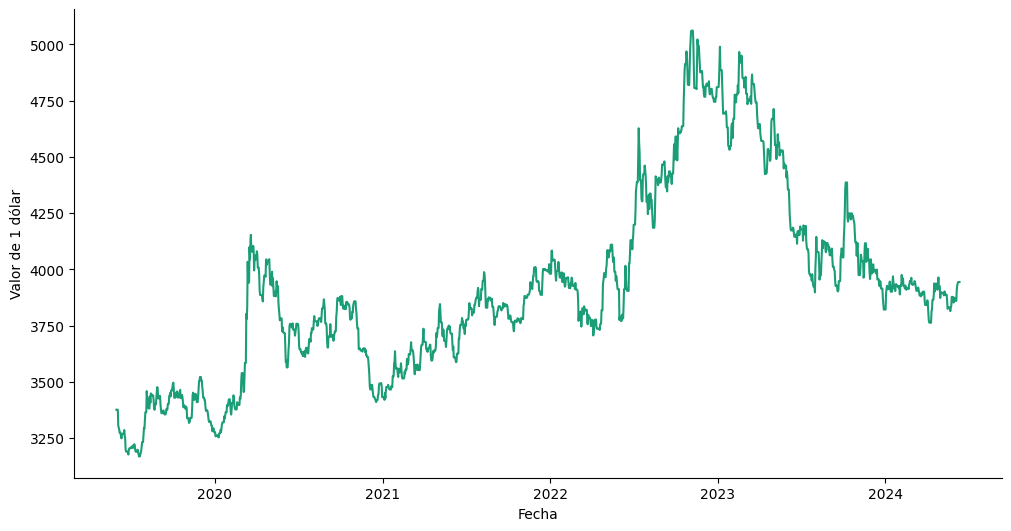

In [25]:
#Gráfico de comportamiento del dolar por día generado por IA

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Fecha']
  ys = series['Valor de 1 dólar']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Fecha', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Fecha')
_ = plt.ylabel('Valor de 1 dólar')




In [26]:
#Paso 2: descripcion de la variables

df.describe()

,Fecha,Valor de 1 dólar,IPC %
count,1838,1838.000000,1796.000000
mean,2021-12-05 11:59:59.999999744,3919.069059,0.557249
min,2019-06-01 00:00:00,3169.510000,-0.380000
25%,2020-09-02 06:00:00,3646.732500,0.250000
50%,2021-12-05 12:00:00,3876.470000,0.500000
75%,2023-03-09 18:00:00,4080.230000,0.810000
max,2024-06-11 00:00:00,5061.210000,1.780000
std,NaN,416.334269,0.471679


In [27]:
#Ya que el valor del IPC esta dado mensual quiero convertirlo en diario con el valor de crecimiento o decrecimiento dividido en la cantida de dias del mes.

#Creamos la celda de los dias del mes con base a la fecha
df['Dias_mes'] = df['Fecha'].dt.days_in_month
#Obtenemos el IPC diario
df['IPC_por_dia'] = df['IPC %'] / df['Dias_mes']

df.head()


,Fecha,Valor de 1 dólar,IPC %,Dias_mes,IPC_por_dia
0,2019-06-01,3377.16,0.27,30,0.009
1,2019-06-02,3377.16,0.27,30,0.009
2,2019-06-03,3377.16,0.27,30,0.009
3,2019-06-04,3377.16,0.27,30,0.009
4,2019-06-05,3306.37,0.27,30,0.009


In [28]:
#Agregamos los valore XY y X^2

df['x*y'] = df['Valor de 1 dólar']*df['IPC_por_dia']
df['x^2'] = df['Valor de 1 dólar']**2

df.head()


,Fecha,Valor de 1 dólar,IPC %,Dias_mes,IPC_por_dia,x*y,x^2
0,2019-06-01,3377.16,0.27,30,0.009,30.39444,1.140521e+07
1,2019-06-02,3377.16,0.27,30,0.009,30.39444,1.140521e+07
2,2019-06-03,3377.16,0.27,30,0.009,30.39444,1.140521e+07
3,2019-06-04,3377.16,0.27,30,0.009,30.39444,1.140521e+07
4,2019-06-05,3306.37,0.27,30,0.009,29.75733,1.093208e+07


In [29]:
#Crearemos una variable categorica con la comparación del valor del dolar del día anterior

df['Tendencia'] = df['Valor de 1 dólar'].shift(-1).apply(lambda x: 'a la baja' if x < df.loc[0, 'Valor de 1 dólar'] else ('estable' if x == df.loc[0, 'Valor de 1 dólar'] else 'a la alza'))

df.head()


,Fecha,Valor de 1 dólar,IPC %,Dias_mes,IPC_por_dia,x*y,x^2,Tendencia
0,2019-06-01,3377.16,0.27,30,0.009,30.39444,1.140521e+07,estable
1,2019-06-02,3377.16,0.27,30,0.009,30.39444,1.140521e+07,estable
2,2019-06-03,3377.16,0.27,30,0.009,30.39444,1.140521e+07,estable
3,2019-06-04,3377.16,0.27,30,0.009,30.39444,1.140521e+07,a la baja
4,2019-06-05,3306.37,0.27,30,0.009,29.75733,1.093208e+07,a la baja


In [30]:
#descripcion con las categoricas.

df_stats = df.describe(include='all')
df_stats

,Fecha,Valor de 1 dólar,IPC %,Dias_mes,IPC_por_dia,x*y,x^2,Tendencia
count,1838,1838.000000,1796.000000,1838.000000,1796.000000,1796.000000,1.838000e+03,1838
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a la alza
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1702
mean,2021-12-05 11:59:59.999999744,3919.069059,0.557249,30.467356,0.018396,75.556463,1.553234e+07,NaN
min,2019-06-01 00:00:00,3169.510000,-0.380000,28.000000,-0.012667,-47.629453,1.004579e+07,NaN
25%,2020-09-02 06:00:00,3646.732500,0.250000,30.000000,0.008065,28.653707,1.329866e+07,NaN
50%,2021-12-05 12:00:00,3876.470000,0.500000,31.000000,0.016452,64.149005,1.502702e+07,NaN
75%,2023-03-09 18:00:00,4080.230000,0.810000,31.000000,0.026129,115.782890,1.664828e+07,NaN
max,2024-06-11 00:00:00,5061.210000,1.780000,31.000000,0.059286,294.432421,2.561585e+07,NaN


---------MATRIZ CORRELACIÓN---------
                  Valor de 1 dólar     IPC %  IPC_por_dia       x*y       x^2
Valor de 1 dólar          1.000000  0.525279     0.518831  0.615211  0.997939
IPC %                     0.525279  1.000000     0.998224  0.987168  0.527192
IPC_por_dia               0.518831  0.998224     1.000000  0.988607  0.520937
x*y                       0.615211  0.987168     0.988607  1.000000  0.620509
x^2                       0.997939  0.527192     0.520937  0.620509  1.000000
------------------------------------


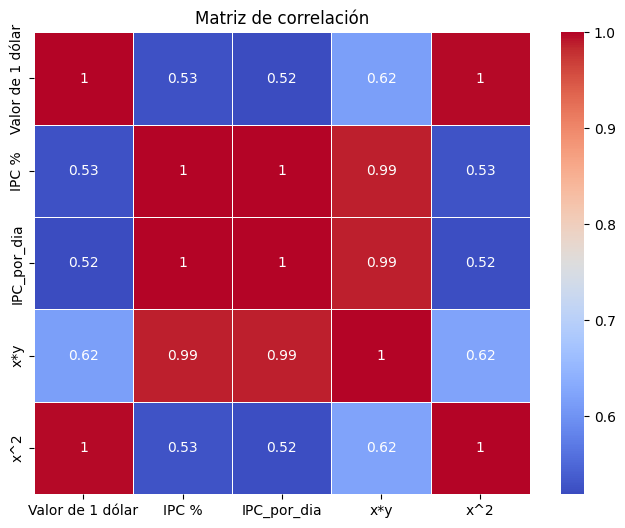

In [36]:
#Eliminamos las celdas que no se utlizan.
df = df.drop (['Dias_mes'], axis = 1)
df = df.drop (['Tendencia'], axis = 1)
numeric_columns = ['Valor de 1 dólar', 'IPC %', 'IPC_por_dia', 'x*y', 'x^2']
matriz_corr = df[numeric_columns].corr()
print("---------MATRIZ CORRELACIÓN---------")
print(matriz_corr)
print("------------------------------------")

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

Cálculo de una matriz de correlación:

segun GEMINI

Método de Correlación de Pearson
El coeficiente de correlación de Pearson mide la relación lineal entre dos variables continuas. Se calcula mediante la fórmula:

[ r_{xy} = \frac{\Sigma(xy) - n\bar{x}\bar{y}}{\sqrt{(n\Sigma(x^2) - (\Sigma x)^2)(n\Sigma(y^2) - (\Sigma y)^2)}} ]

Donde:

( \Sigma(xy) ) es la suma del producto de cada par de observaciones correspondientes de las dos variables.
( \Sigma(x^2) ) es la suma de los cuadrados de las observaciones de la primera variable.
( \Sigma(y^2) ) es la suma de los cuadrados de las observaciones de la segunda variable.
( n ) es el número total de observaciones.
( \bar{x} ) y ( \bar{y} ) son las medias de las dos variables.
El coeficiente de correlación de Pearson varía de -1 a +1, indicando la intensidad y dirección de la relación lineal entre las variables:

-1 indica una correlación negativa perfecta.
+1 indica una correlación positiva perfecta.
0 indica ausencia de correlación.
Cálculo en Python con Pandas
Para calcular la matriz de correlación en Python, puedes usar la biblioteca Pandas, que ofrece una función conveniente para este propósito. Aquí te muestro cómo hacerlo:

import pandas as pd

# Suponiendo que 'datos' es tu DataFrame
correlation_matrix = datos.corr()

print(correlation_matrix)
Esta línea de código genera una matriz de correlación de Pearson para todas las parejas de variables en el DataFrame datos.

Métodos Alternativos
Además del coeficiente de correlación de Pearson, también puedes calcular otros tipos de correlación, como Spearman y Kendall, que miden la relación sin asumir una relación lineal. Para hacerlo en Pandas, simplemente cambia el argumento method en la función corr():

correlation_matrix_spearman = datos.corr(method='spearman')
correlation_matrix_kendall = datos.corr(method='kendall')